
# MODULE 3: IMAGE CLASSIFICATION

Christian Mata, PhD


# **EXERCISE 4**

#1. Generate synthetic image with random blobs

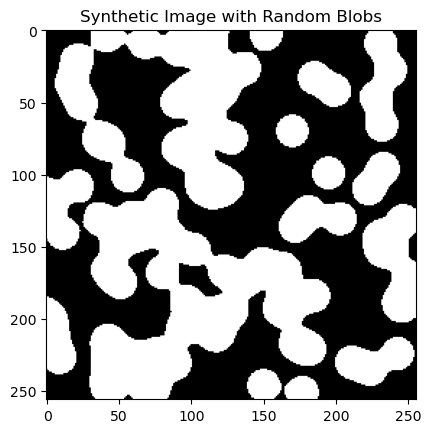

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import binary_blobs

# Generate a synthetic image of binary blobs
# length defines the image size, blob_size_fraction controls blob scale
image = binary_blobs(length=256, blob_size_fraction=0.1, n_dim=2)

# Show the image
plt.imshow(image, cmap='gray')
plt.title('Synthetic Image with Random Blobs')
plt.axis('on')
plt.show()


# 2. Object segmentation and labeling

- Segmentation of blobs using Otsu's optimal threshold
- Labeling connected regions
- Visualization



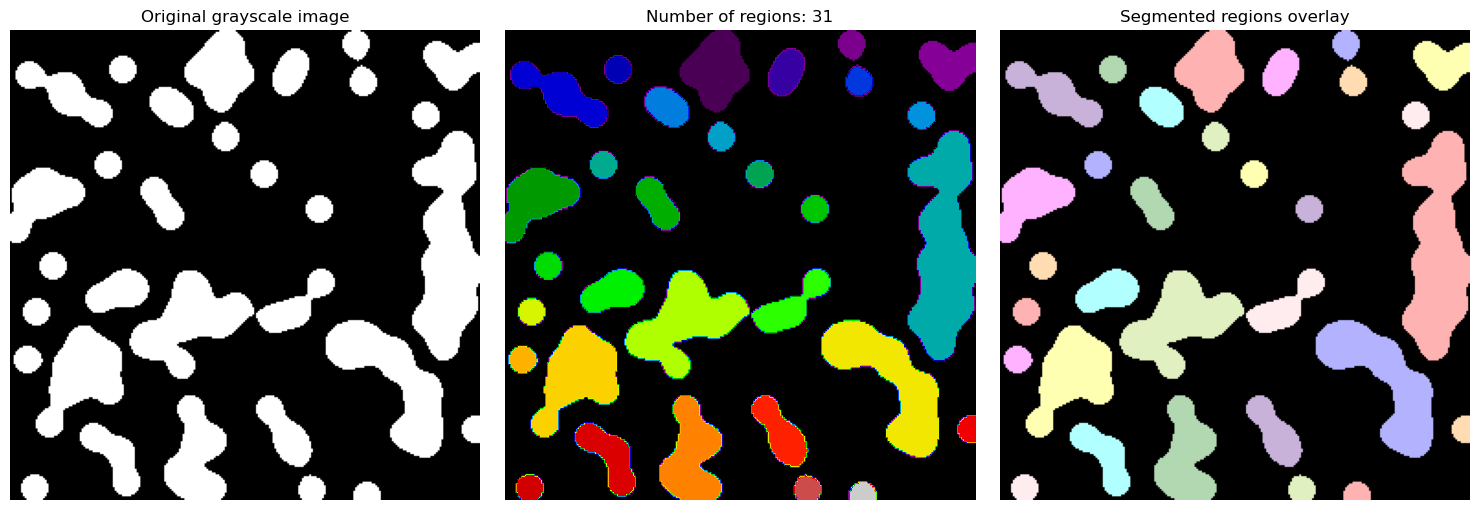

In [2]:

import matplotlib.pyplot as plt
from skimage.data import binary_blobs
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb
from skimage import img_as_ubyte

# Step 1: Generate synthetic image with blobs
image = binary_blobs(length=256, blob_size_fraction=0.1, volume_fraction=0.3, n_dim=2)
gray_image = img_as_ubyte(image)

# Step 2: Apply Otsu’s thresholding
thresh = threshold_otsu(gray_image)
binary = gray_image > thresh

# Step 3: Label connected components
labeled_image = label(binary)
num_regions = labeled_image.max()

# Step 4: Create colored overlays
label_overlay = label2rgb(labeled_image, image=binary, bg_label=0)

# Step 5: Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(binary, cmap='gray')
ax[0].set_title("Original grayscale image")
ax[0].axis('off')

ax[1].imshow(labeled_image, cmap='nipy_spectral')
ax[1].set_title(f"Number of regions: {num_regions}")
ax[1].axis('off')

ax[2].imshow(label_overlay)
ax[2].set_title("Segmented regions overlay")
ax[2].axis('off')

plt.tight_layout()
plt.show()


# 3. Get regional properties in a pandas dataframe

Function documentation with a list of available attributes can be found at https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops_table


In [3]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.data import binary_blobs
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table
from skimage.color import label2rgb
from skimage import img_as_ubyte

# Step 1: Generate synthetic binary blob image
image = binary_blobs(length=256, blob_size_fraction=0.1, volume_fraction=0.3, n_dim=2)
gray_image = img_as_ubyte(image)

# Step 2: Threshold using Otsu's method
thresh = threshold_otsu(gray_image)
binary = gray_image > thresh

# Step 3: Label connected regions
labeled_image = label(binary)

# Step 4: Get region properties
props = regionprops_table(labeled_image, properties=[
    'label',
    'area',
    'eccentricity',
    'extent',
    'axis_major_length'
])
df = pd.DataFrame(props)


# Step 5: Apply dark-mode striped styling like the image
def dark_striped_style(df):
    return df.style.set_table_styles([
        {'selector': 'thead th',
         'props': [('color', '#e6e6e6'), ('background-color', '#1e1e1e'), ('text-align', 'center'),
                   ('font-family', 'monospace')]},
        {'selector': 'td', 'props': [('color', '#e6e6e6'), ('background-color', '#1e1e1e'), ('text-align', 'center'),
                                     ('font-family', 'monospace')]},
        {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#2c2c2c')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]}
    ])


# Step 6: Display styled table (only works in Jupyter/Notebook environments)
dark_striped_style(df)


,label,area,eccentricity,extent,axis_major_length
0,1,633.000000,0.862959,0.427703,53.565373
1,2,169.000000,0.000000,0.751111,14.679213
2,3,399.000000,0.923033,0.509579,38.083145
3,4,232.000000,0.721885,0.716049,21.497394
4,5,170.000000,0.150418,0.755556,14.804413
5,6,1349.000000,0.886916,0.535317,68.814896
6,7,169.000000,0.000000,0.751111,14.679213
7,8,624.000000,0.964854,0.445714,59.417671
8,9,176.000000,0.216903,0.782222,15.149602
9,10,399.000000,0.832604,0.809331,30.349416


Represent area of the blobs as a function of the major axis length

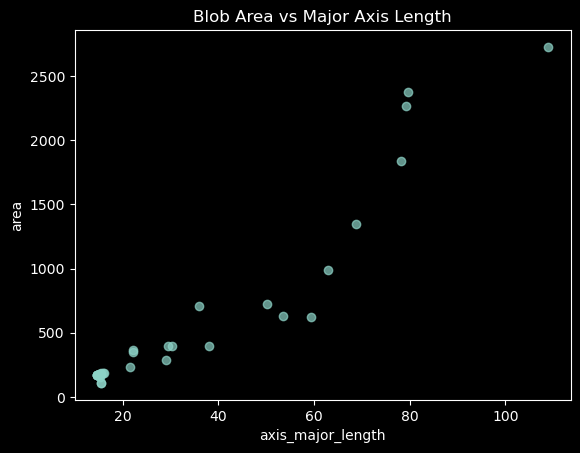

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Assuming you have a DataFrame `df` with 'axis_major_length' and 'area' columns
# df = pd.DataFrame({'axis_major_length': [...], 'area': [...]})

plt.style.use('dark_background')  # For black background like the image
plt.scatter(df['axis_major_length'], df['area'], alpha=0.7)
plt.xlabel('axis_major_length')
plt.ylabel('area')
plt.title('Blob Area vs Major Axis Length')
plt.grid(False)
plt.show()


Clear correlation between blob's length and area can be observed

#4. Analyze blobs


Since you have the feature data in a pandas dataframe, you can exploit all the functions of te libraries. For instance:

How many blobs have an area above the average?

In [5]:
# Assuming your DataFrame is named df and has an 'area' column

# Calculate the average area
average_area = df['area'].mean()

# Filter blobs with area above the average
above_average_blobs = df[df['area'] > average_area]

# Count them
count_above_average = len(above_average_blobs)

# Output results
print(f"Average area: {average_area:.2f}")
print(f"Number of blobs with area above average: {count_above_average}")

above_average_blobs



Average area: 561.74
Number of blobs with area above average: 10


,label,area,eccentricity,extent,axis_major_length
0,1,633.0,0.862959,0.427703,53.565373
5,6,1349.0,0.886916,0.535317,68.814896
7,8,624.0,0.964854,0.445714,59.417671
10,11,986.0,0.930768,0.458605,62.895323
14,15,1838.0,0.874403,0.513838,78.228491
15,16,2374.0,0.843507,0.535046,79.628202
16,17,2729.0,0.911777,0.403281,108.963209
17,18,725.0,0.907396,0.520086,50.173918
25,26,2269.0,0.662920,0.427146,79.218811
29,30,705.0,0.705873,0.767974,35.878272


In [6]:
# Calculate the mean area
mean_area = df['area'].mean()

# Count how many blobs have area >= mean
count = (df['area'] >= mean_area).sum()

# Print the result
print(f"there are {count} blobs with an area larger or equal the mean area {mean_area}")


there are 10 blobs with an area larger or equal the mean area 561.7428571428571


Represent the blobs that have an area smaller than the average blob's area

In [7]:
# Calculate the mean area
mean_area = df['area'].mean()

# Filter and count blobs with area < mean
count = (df['area'] < mean_area).sum()

# Print the result
print(f"there are {count} blobs with an area smaller than the mean area {mean_area}")


there are 25 blobs with an area smaller than the mean area 561.7428571428571


find the labels of small and large blobs

In [8]:
# Calculate mean area
mean_area = df['area'].mean()

# Get labels of small blobs (area < mean)
small_blob_labels = df[df['area'] < mean_area]['label'].tolist()

# Get labels of large blobs (area >= mean)
large_blob_labels = df[df['area'] >= mean_area]['label'].tolist()

# Print results
print(f"labels of small blobs: {small_blob_labels}")
print(f"labels of large blobs: {large_blob_labels}")


labels of small blobs: [2, 3, 4, 5, 7, 9, 10, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31, 32, 33, 34, 35]
labels of large blobs: [1, 6, 8, 11, 15, 16, 17, 18, 26, 30]


Create a binary mask with the large and small blobs

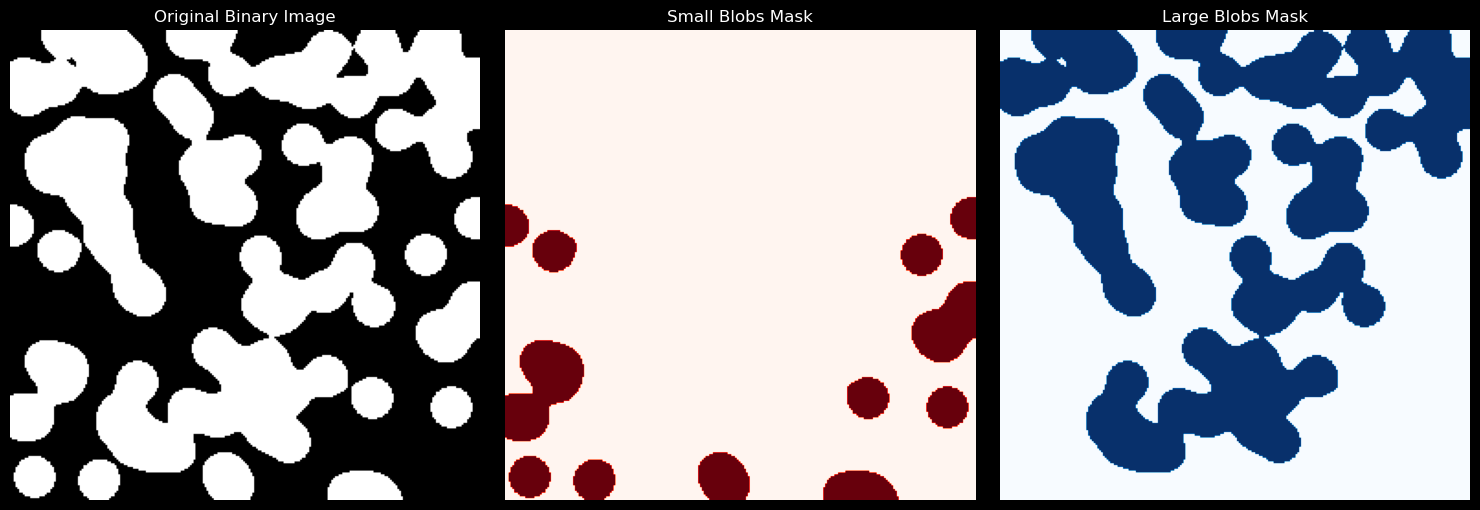

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.data import binary_blobs
from skimage.measure import label, regionprops_table

# Step 1: Set random seed manually
np.random.seed(42)

# Step 2: Generate synthetic binary blob image
binary_image = binary_blobs(length=256)

# Step 3: Label the blobs
label_image = label(binary_image)

# Step 4: Extract region properties
props = regionprops_table(label_image, properties=('label', 'area'))
df = pd.DataFrame(props)

# Step 5: Compute mean area and classify
mean_area = df['area'].mean()
large_blob_labels = df[df['area'] >= mean_area]['label'].tolist()
small_blob_labels = df[df['area'] < mean_area]['label'].tolist()

# Step 6: Create binary masks
large_mask = np.isin(label_image, large_blob_labels)
small_mask = np.isin(label_image, small_blob_labels)

# Step 7: Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Original Binary Image')

axes[1].imshow(small_mask, cmap='Reds')
axes[1].set_title('Small Blobs Mask')

axes[2].imshow(large_mask, cmap='Blues')
axes[2].set_title('Large Blobs Mask')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


#5. Obtain texture-based regional properties

For the original image

In [10]:
import numpy as np

# Define the image
image = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 2, 2, 2],
    [2, 2, 3, 3]
], dtype=np.uint8)

print("Image:\n", image)

# Create an empty GLCM (for grayscale levels 0–3)
max_val = image.max()
glcm = np.zeros((max_val+1, max_val+1), dtype=int)

# Calculate co-occurrences to the right (angle = 0°, distance = 1)
rows, cols = image.shape
for i in range(rows):
    for j in range(cols - 1):  # avoid right border
        current = image[i, j]
        neighbor = image[i, j + 1]
        glcm[current, neighbor] += 1

# Pretty-print counts
for i in range(max_val + 1):
    for j in range(max_val + 1):
        if glcm[i, j] > 0:
            print(f"Number of times that a grayscale level {i} has a neighbour with value {j} "
                  f"at a distance of 1 pixel to the right (angle equal zero): {glcm[i, j]}")


Image:
 [[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
Number of times that a grayscale level 0 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 2
Number of times that a grayscale level 0 has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 2
Number of times that a grayscale level 0 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 1
Number of times that a grayscale level 1 has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 2
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 3
Number of times that a grayscale level 2 has a neighbour with value 3 at a distance of 1 pixel to the right (angle equal zero): 1
Number of times that a grayscale level 3 has a neighbour with value 3 at a distance of 1 pixel to the right (angle equal zero): 1


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.data import binary_blobs
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage import img_as_ubyte

# Step 1: Generate synthetic binary blob image
image = binary_blobs(length=256, blob_size_fraction=0.1, volume_fraction=0.3, n_dim=2)
gray_image = img_as_ubyte(image)

# Step 2: Threshold using Otsu's method
thresh = threshold_otsu(gray_image)
binary = gray_image > thresh

# Step 3: Label connected regions
labeled_image = label(binary)

# Step 4: Extract texture features manually per region
def compute_manual_glcm_features(region_img):
    levels = region_img.max() + 1
    glcm = np.zeros((levels, levels), dtype=np.float64)

    for i in range(region_img.shape[0]):
        for j in range(region_img.shape[1] - 1):
            i_val = region_img[i, j]
            j_val = region_img[i, j + 1]
            glcm[i_val, j_val] += 1

    glcm /= glcm.sum() + 1e-10  # normalize and avoid division by zero

    i_idx, j_idx = np.indices(glcm.shape)
    contrast = np.sum((i_idx - j_idx) ** 2 * glcm)
    dissimilarity = np.sum(np.abs(i_idx - j_idx) * glcm)
    homogeneity = np.sum(glcm / (1. + (i_idx - j_idx) ** 2))
    energy = np.sum(glcm ** 2)

    mean_i = np.sum(i_idx * glcm)
    mean_j = np.sum(j_idx * glcm)
    std_i = np.sqrt(np.sum(((i_idx - mean_i) ** 2) * glcm))
    std_j = np.sqrt(np.sum(((j_idx - mean_j) ** 2) * glcm))
    correlation = np.sum((i_idx - mean_i) * (j_idx - mean_j) * glcm) / (std_i * std_j + 1e-10)

    return contrast, dissimilarity, homogeneity, energy, correlation

# Step 5: Measure regionprops and texture features
features = []
for region in regionprops(labeled_image, intensity_image=gray_image):
    minr, minc, maxr, maxc = region.bbox
    cropped = region.intensity_image[region.image]  # values within blob only
    if cropped.size == 0:
        continue
    contrast, dissim, homog, energy, corr = compute_manual_glcm_features(cropped.reshape(-1, 1))
    features.append({
        'label': region.label,
        'area': region.area,
        'eccentricity': region.eccentricity,
        'extent': region.extent,
        'axis_major_length': region.axis_major_length,
        'Contrast': contrast,
        'Dissimilarity': dissim,
        'Homogeneity': homog,
        'Energy': energy,
        'Correlation': corr
    })

df = pd.DataFrame(features)

# Step 6: Apply dark-striped styling
def dark_striped_style(df):
    return df.style.set_table_styles([
        {'selector': 'thead th',
         'props': [('color', '#e6e6e6'), ('background-color', '#1e1e1e'), ('text-align', 'center'),
                   ('font-family', 'monospace')]},
        {'selector': 'td', 'props': [('color', '#e6e6e6'), ('background-color', '#1e1e1e'), ('text-align', 'center'),
                                     ('font-family', 'monospace')]},
        {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#2c2c2c')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]}
    ])

# Step 7: Display
dark_striped_style(df)


,label,area,eccentricity,extent,axis_major_length,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,1,163.000000,0.475885,0.835897,15.406158,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,1621.000000,0.929235,0.422686,85.709873,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,5032.000000,0.403120,0.370763,129.259199,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,1018.000000,0.844267,0.509000,57.955253,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,177.000000,0.000000,0.786667,14.996798,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,1340.000000,0.909849,0.466899,78.578136,0.000000,0.000000,0.000000,0.000000,0.000000
6,7,2010.000000,0.963838,0.335335,105.614026,0.000000,0.000000,0.000000,0.000000,0.000000
7,8,408.000000,0.929494,0.485714,39.645260,0.000000,0.000000,0.000000,0.000000,0.000000
8,9,1275.000000,0.784663,0.583791,56.320745,0.000000,0.000000,0.000000,0.000000,0.000000
9,10,185.000000,0.361946,0.770833,15.895985,0.000000,0.000000,0.000000,0.000000,0.000000
